# GDP and Life Expectancy

In this project, I will analyze GDP and life expectancy rate collected from a select countries from year 2000-2015. The goal of this project is to analyze the relationship between GDP and life expectancy. The data was sourced from Codeacademy.

The dataset provided has the following columns of data:

- __Country__ - nation
- __Year__ - the year for the observation
- __Life expectancy at birth (years)__ - life expectancy value in years
- __GDP__ - Gross Domestic Product (in USD billions)

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [87]:
data = pd.read_csv('all_data.csv')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data = data.rename({'Life expectancy at birth (years)': 'Life expectancy'}, axis = 'columns')
data.head(10)


,Country,Year,Life expectancy,GDP
0,Chile,2000,77.300,77860932152.000
1,Chile,2001,77.300,70979923960.000
2,Chile,2002,77.800,69736811435.000
3,Chile,2003,77.900,75643459840.000
4,Chile,2004,78.000,99210392858.000
5,Chile,2005,78.400,122965000000.000
6,Chile,2006,78.900,154788000000.000
7,Chile,2007,78.900,173606000000.000
8,Chile,2008,79.600,179638000000.000
9,Chile,2009,79.300,172389000000.000


In [88]:
data.describe(include = 'all')

,Country,Year,Life expectancy,GDP
count,96,96.000,96.000,96.000
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500,72.790,3880498570768.396
std,NaN,4.634,10.673,5197561310975.917
min,NaN,2000.000,44.300,4415702800.000
25%,NaN,2003.750,74.475,173301750000.000
50%,NaN,2007.500,76.750,1280220000000.000
75%,NaN,2011.250,78.900,4067510000000.000


As shown in the summary statistics, there are a total of 96 observations from 6 countries. Some of the things that I want to find out in the data are the following:
- What is the average life expectancy in these nations?
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the distribution of life expectancy and GDP of each countries?

In [89]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [90]:
#Since I'm looking for the mean life expectancy and GDP for each country, I don't need the year column so I used .drop().
data_mean = data.drop('Year', axis = 1).groupby('Country').mean().reset_index()
data_mean

,Country,Life expectancy,GDP
0,Chile,78.944,169788845015.312
1,China,74.263,4957713750000.000
2,Germany,79.656,3094775625000.000
3,Mexico,75.719,976650625000.000
4,United States of America,78.062,14075000000000.000
5,Zimbabwe,50.094,9062579595.062


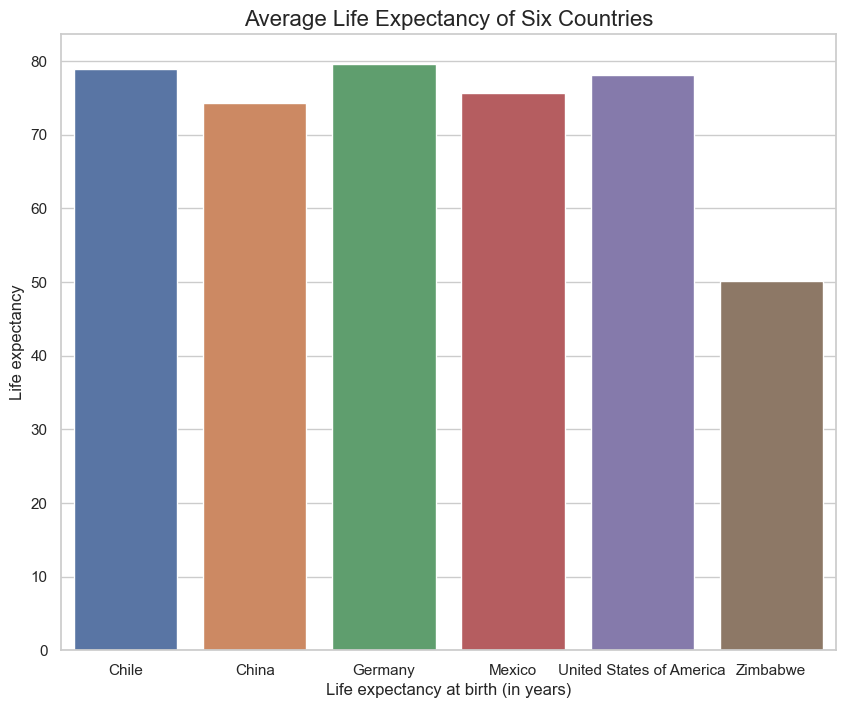

<Figure size 640x480 with 0 Axes>

In [91]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Country', y = 'Life expectancy', data = data_mean)
plt.xlabel('Life expectancy at birth (in years)')
plt.title('Average Life Expectancy of Six Countries', fontsize = 16)
plt.show()
plt.savefig('ave_life_expectancy.png')
plt.clf()

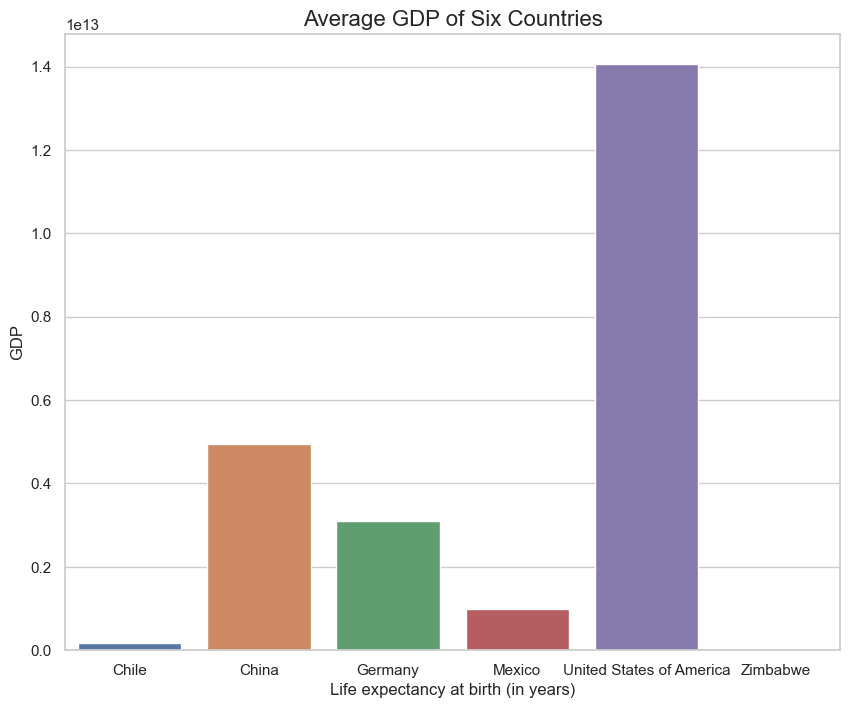

<Figure size 640x480 with 0 Axes>

In [92]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'Country', y = 'GDP', data = data_mean)
plt.xlabel('Life expectancy at birth (in years)')
plt.title('Average GDP of Six Countries', fontsize = 16)
plt.show()
plt.savefig('average_gdp.png')
plt.clf()

###### Analysis
   Based on the Dataframe above, Gemany has the highest average Life expectancy among the six countries, which is 79.656 years in age. Zimbabwe on the other hand has the lowest life expectancy rate, which is 50.094 years in age. In terms of GDP, United States have the highest average GDP, which is approximately 14 trillion(USD). Zimbabwe also have the lowest average GDP, which is approximately 9 billion(USD).

In [93]:
#Since the data was collected from six countries, I want to first analyze each of them therefore I will create separate variables for each countries.
#This will be useful if I would want to create a separate analysis for each countries.
chile = data[data.Country == 'Chile']
china = data[data.Country == 'China']
germany = data[data.Country == 'Germany']
mexico = data[data.Country == 'Mexico']
us = data[data.Country == 'United States of America']
zimbabwe = data[data.Country == 'Zimbabwe']

## Life Expectancy

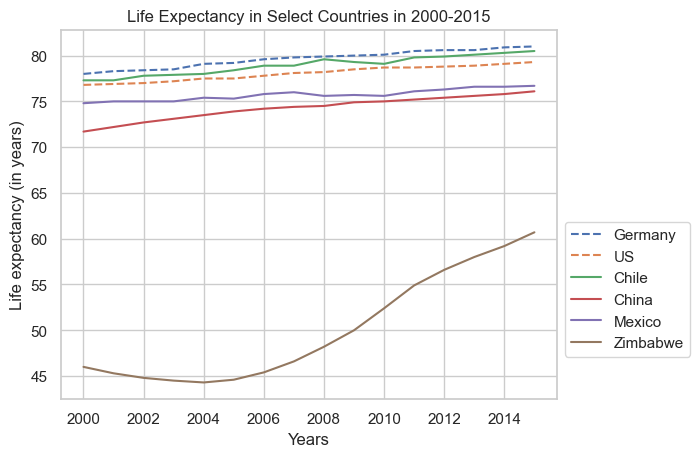

<Figure size 640x480 with 0 Axes>

In [94]:
sns.set_theme(style = 'whitegrid')
sns.lineplot(palette = 'tab10', linewidth = 2.5)
plt.plot(germany['Year'], germany['Life expectancy'], linestyle = '--')
plt.plot(us['Year'], us['Life expectancy'], linestyle = '--')
plt.plot(chile['Year'], chile['Life expectancy'])
plt.plot(china['Year'], china['Life expectancy'])
plt.plot(mexico['Year'], mexico['Life expectancy'])
plt.plot(zimbabwe['Year'], zimbabwe['Life expectancy'])
plt.legend(['Germany', 'US', 'Chile', 'China', 'Mexico', 'Zimbabwe'], loc = 2, bbox_to_anchor=(1, 0.5))
plt.title('Life Expectancy in Select Countries in 2000-2015')
plt.xlabel('Years')
plt.ylabel('Life expectancy (in years)')

plt.show()
plt.savefig('life_expectancy.png')
plt.clf()

######   Analysis
   The graph shows that the average life expectancy in six countries have relatively increased in a span of 10 years. Zimbabwe, in particular, have shown the highest increase in its life expectancy. The country's life expectancy, however, is still considered below the average (which is 72.79 years).

## GDP

[_Gross Domestic Product_](https://www.imf.org/external/pubs/ft/fandd/basics/gdp.htm), also known as _GDP_, is the standard measure of the value added created through the production of goods and services in a country during a specific period. 

In this section, I will analyze the `GDP` of select countries using a line plot. First, I will compare the countries' `GDP` using an overlapping line plot. Then I will create a  separate visualization for each countries.

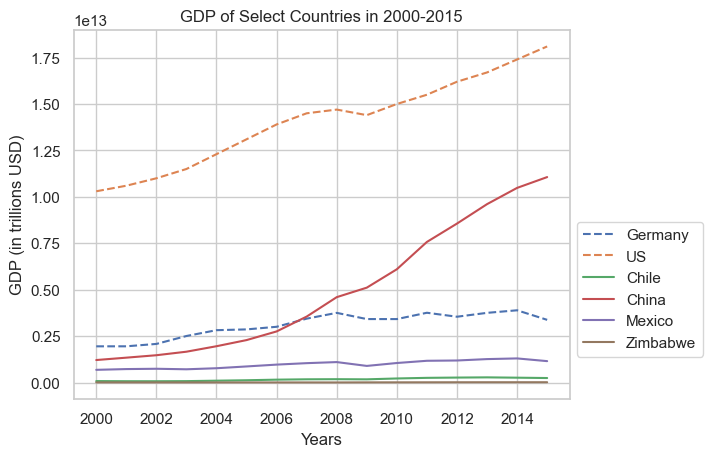

<Figure size 640x480 with 0 Axes>

In [95]:
sns.set_theme(style = 'whitegrid')
sns.lineplot(palette = 'tab10', linewidth = 2.5)
plt.plot(germany['Year'], germany['GDP'], linestyle = '--')
plt.plot(us['Year'], us['GDP'], linestyle = '--')
plt.plot(chile['Year'], chile['GDP'])
plt.plot(china['Year'], china['GDP'])
plt.plot(mexico['Year'], mexico['GDP'])
plt.plot(zimbabwe['Year'], zimbabwe['GDP'])
plt.legend(['Germany', 'US', 'Chile', 'China', 'Mexico', 'Zimbabwe'], loc = 2, bbox_to_anchor=(1, 0.5))
plt.title('GDP of Select Countries in 2000-2015')
plt.xlabel('Years')
plt.ylabel('GDP (in trillions USD)')

plt.show()
plt.savefig('gdp.png')
plt.clf()

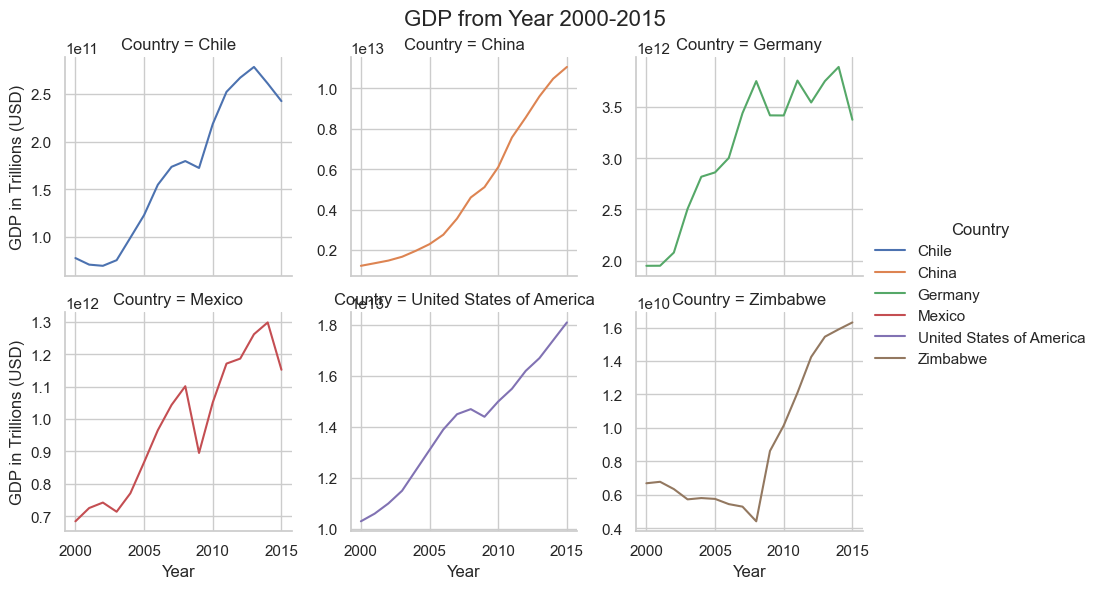

<Figure size 640x480 with 0 Axes>

In [96]:
ggdp = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

ggdp = (ggdp.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions (USD)"))
ggdp.fig.suptitle('GDP from Year 2000-2015', fontsize = 16)
ggdp.fig.subplots_adjust(top = 0.9)
plt.show()
plt.clf()

###### Analysis
   The figure shows that among the six countries, China has shown the largest and steady growth in its GDP in a span of 10 years. It can also be seen that although US and Germany are both considered as first-world countries, US are more consistent in its growth as compared to Germany.

## GDP and Life Expectancy

In these section, I want to find out if there is a correlation between a country's `GDP` and its `Life Expectancy` at birth. Since both variables are numerical, I will use a scatterplot to analyze the relationship between these two variables. The x-axis will be the `Life Expectancy` while the y-axis will be the `GDP`.

<AxesSubplot:xlabel='Life expectancy', ylabel='GDP'>

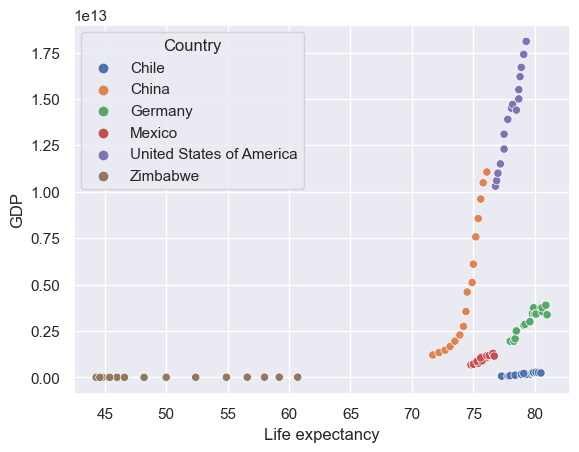

In [97]:
sns.set_theme()

sns.scatterplot(data = data, x = 'Life expectancy', y = 'GDP', hue = 'Country')

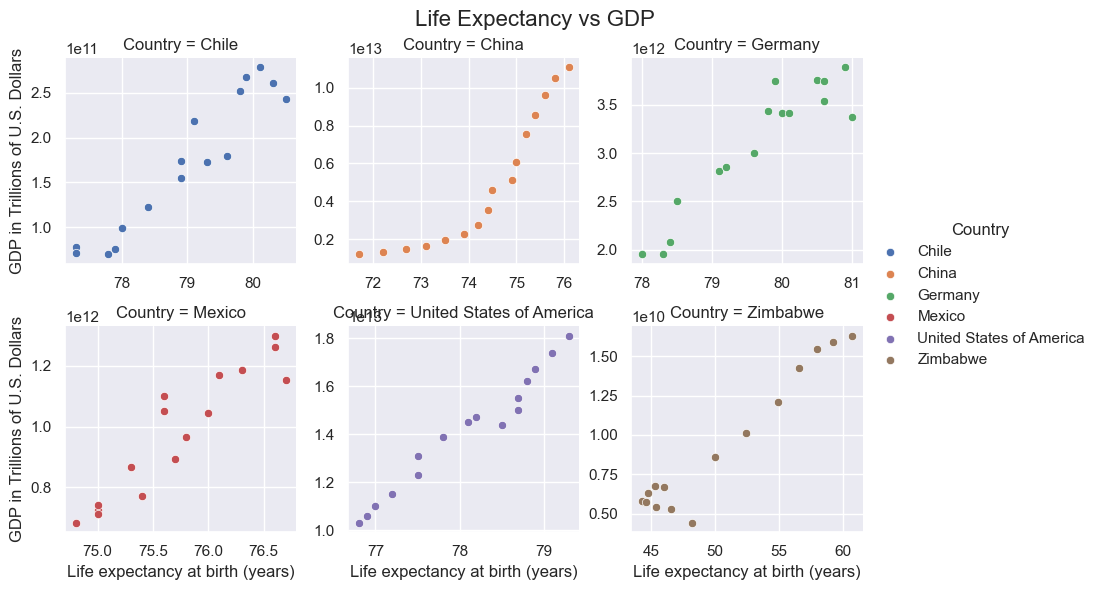

<Figure size 640x480 with 0 Axes>

In [98]:
sns.set_theme()
g = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
g = (g.map(sns.scatterplot,"Life expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
g.fig.subplots_adjust(top = 0.9)

g.fig.suptitle('Life Expectancy vs GDP', fontsize = 16)
plt.show()
plt.clf()

###### Analysis
This figure shows that there is a positive correlation between the countries' `GDP` and it's `Life expectancy`. This indicates that countries with high GDP also tend to have higher life expectancy at birth.

###  Distribution of Life Expectancy and GDP

The last thing that I wanted to find out in this data are the distributions of the countries Life expectancy and GDP. To do that, I will graph a strip plot and violin plot to know that shape of the distribution. 

A Violin Plot is used to visualise the distribution of the data and its [probability density](https://en.wikipedia.org/wiki/Probability_density_function) while a strip plot is used to visualize the distribution of many one-dimensional values (plotted as dots).

The x-axis of these graphs will be `GDP` and `Life expectancy`, consecutively, while the y-axis will be the `Country`. 

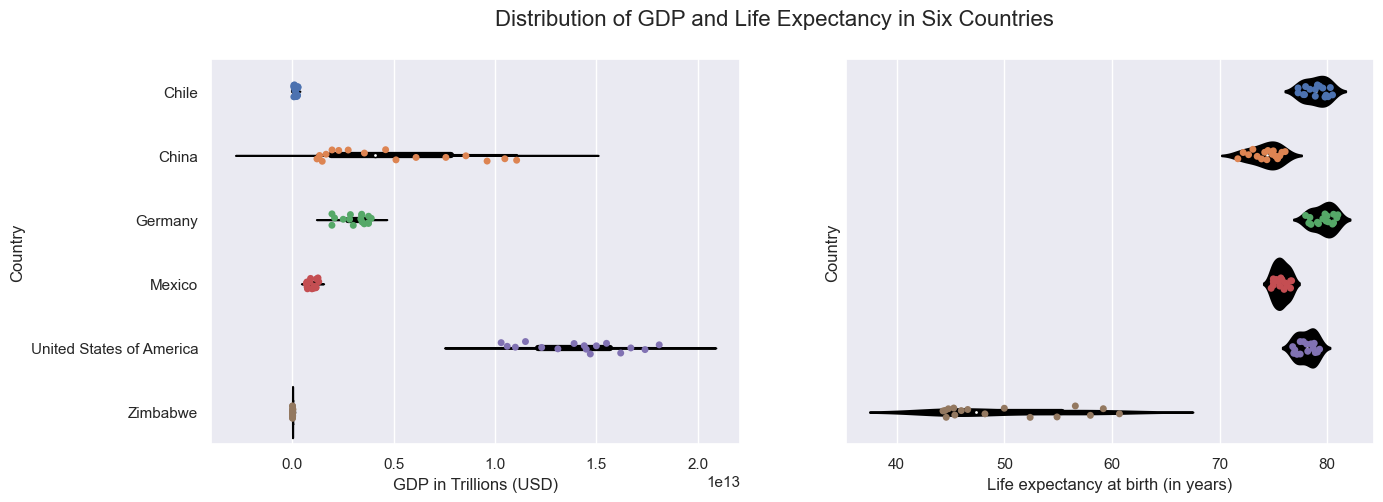

<Figure size 640x480 with 0 Axes>

In [99]:
fig, axes = plt.subplots(1,2, sharey=True, figsize = (15, 5))

axes[0] = sns.violinplot(ax=axes[0], data = data, x = 'GDP', y = 'Country', color = 'black')
axes[0] = sns.stripplot(ax=axes[0], data = data, x = 'GDP', y = 'Country', palette = 'deep')
axes[0].set_xlabel("GDP in Trillions (USD)")

axes[1] = sns.violinplot(ax=axes[1], data = data, x = 'Life expectancy', y = 'Country', color = 'black')
axes[1] = sns.stripplot(ax=axes[1], data = data, x = 'Life expectancy', y = 'Country', palette = 'deep')
axes[1].set_xlabel("Life expectancy at birth (in years)")

fig.suptitle('Distribution of GDP and Life Expectancy in Six Countries', fontsize = 16)

plt.show()
plt.savefig('strip_violin_plot.png')
plt.clf()

###### Analysis
   On the `GDP` graph, China have the widest range of distribution among the six countries, followed by United States. Zimbabwe, Chile, and Mexico on the other hand, have a shorter range of distributions. As for the `life expectancy` graph, Zimbabwe have the widest range of distribution. 

## Conclusion

The data was able to give an answer to the questions posed on the first part of the Data Vizualization project and subsequently meet the goal for this project. It showed that in the years 2000-2015, the life expectancy has increased over time, particularly in Zimbabwe. It also showed that China have seen the largest growth in its GDP. Lastly, the analysis showed that there is a positive correlation between a countries GDP and its life expectancy at birth.